In [235]:
import numpy as np
import pandas as pd

In [236]:
df = pd.read_csv('tips.csv')

In [237]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [239]:
target = 'tip'
data = df.drop('tip',axis=1)

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

In [241]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [242]:
(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

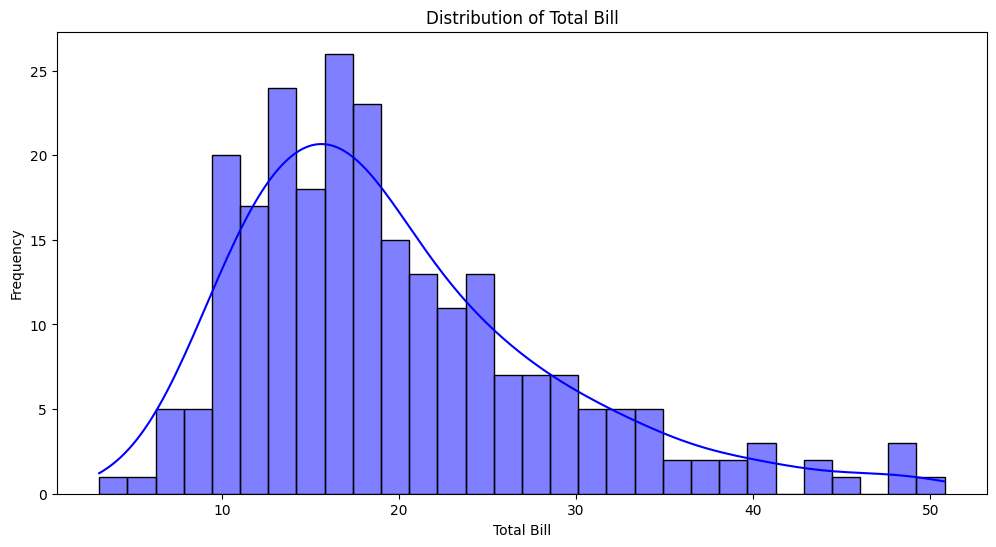

In [243]:
# Distribution of numerical features
plt.figure(figsize=(12, 6))
sns.histplot(df['total_bill'], kde=True, color='blue', bins=30)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

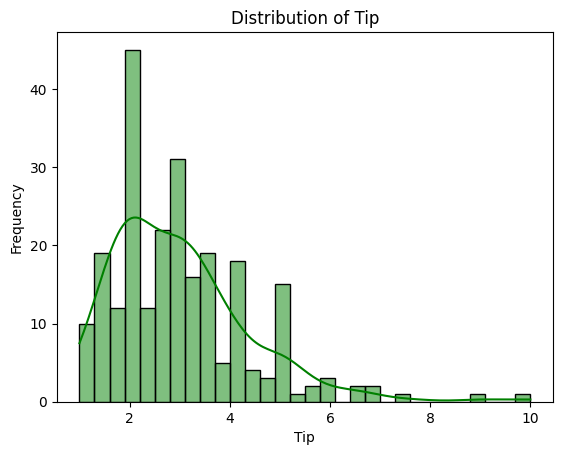

In [244]:

sns.histplot(df['tip'], kde=True, color='green', bins=30)
plt.title('Distribution of Tip')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.show()

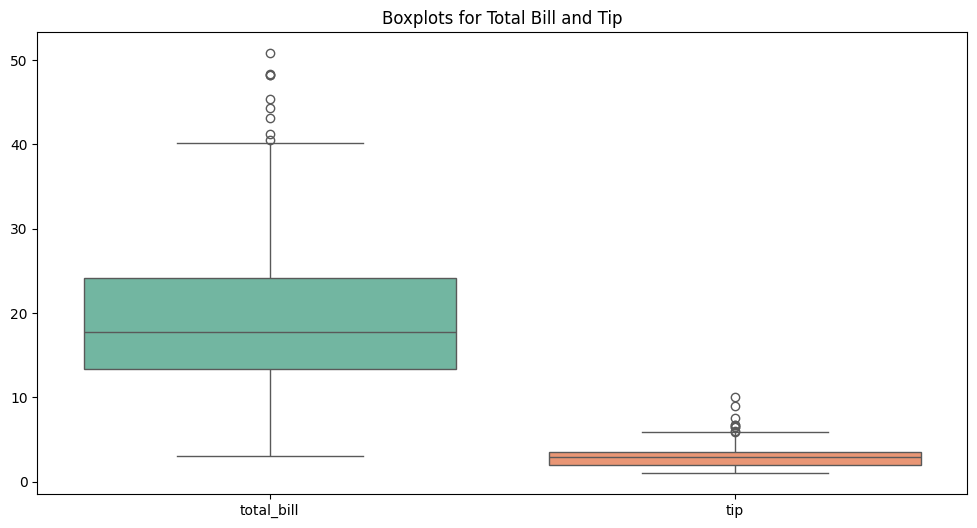

In [245]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['total_bill', 'tip']], palette='Set2')
plt.title('Boxplots for Total Bill and Tip')
plt.show()

In [246]:
# Function to remove outliers based on IQR
""" def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the DataFrame
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Before removing outliers
print(f"Original dataset shape: {df.shape}")

# Remove outliers from 'total_bill'
df = remove_outliers_iqr(df, 'total_bill')

# Remove outliers from 'tip'
df = remove_outliers_iqr(df, 'tip')

# After removing outliers
print(f"Dataset shape after removing outliers: {df.shape}") """

' def remove_outliers_iqr(df, column):\n    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)\n    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)\n    IQR = Q3 - Q1  # Interquartile range\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    # Filter the DataFrame\n    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n\n# Before removing outliers\nprint(f"Original dataset shape: {df.shape}")\n\n# Remove outliers from \'total_bill\'\ndf = remove_outliers_iqr(df, \'total_bill\')\n\n# Remove outliers from \'tip\'\ndf = remove_outliers_iqr(df, \'tip\')\n\n# After removing outliers\nprint(f"Dataset shape after removing outliers: {df.shape}") '

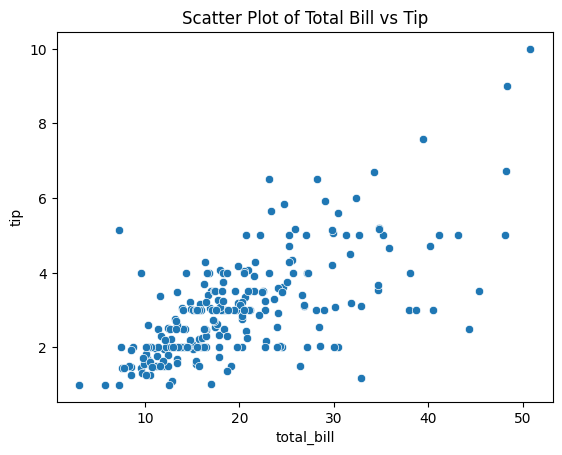

In [247]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()

In [248]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

C:\Users\Utkarsh Sharma\AppData\Local\Temp\ipykernel_11844\1169246669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=df, palette='Set3')


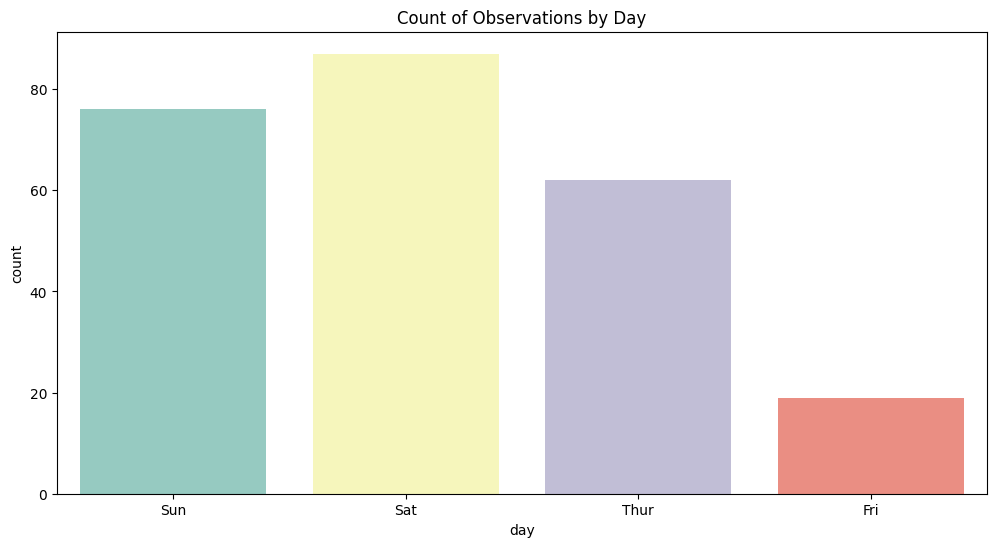

C:\Users\Utkarsh Sharma\AppData\Local\Temp\ipykernel_11844\1169246669.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='time', data=df, palette='Set2')


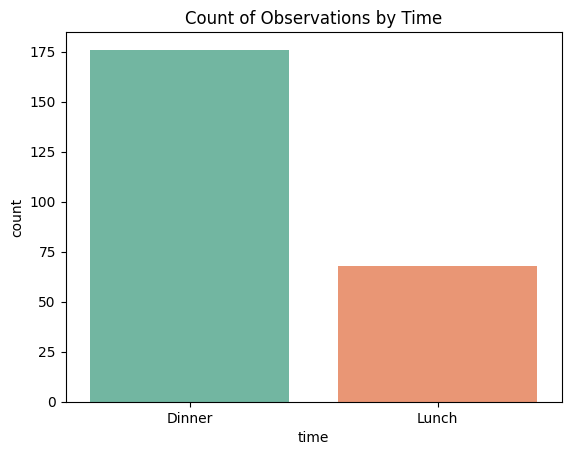

In [249]:
# Categorical Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='day', data=df, palette='Set3')
plt.title('Count of Observations by Day')
plt.show()

sns.countplot(x='time', data=df, palette='Set2')
plt.title('Count of Observations by Time')
plt.show()

In [250]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [251]:
# Pivot table for further exploration
pivot_table = pd.pivot_table(
    df, 
    values='tip', 
    index='day', 
    columns='sex', 
    aggfunc='mean'
)
print("\nPivot Table - Average Tip by Day and Sex:")
print(pivot_table)


Pivot Table - Average Tip by Day and Sex:
sex     Female      Male
day                     
Fri   2.781111  2.693000
Sat   2.801786  3.083898
Sun   3.367222  3.220345
Thur  2.575625  2.980333


C:\Users\Utkarsh Sharma\AppData\Local\Temp\ipykernel_11844\3889412845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='size', y='total_bill', data=df, palette='viridis')


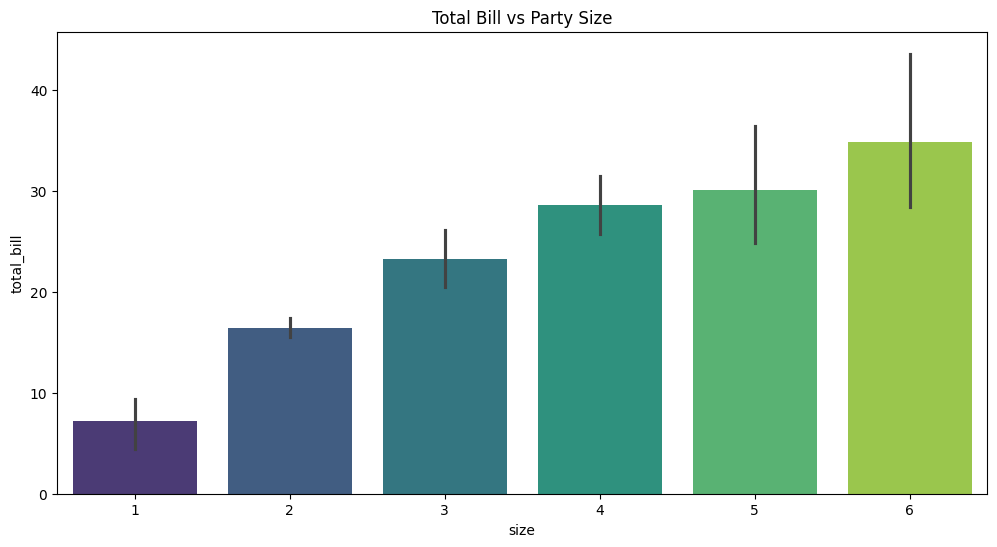

In [252]:
# Additional Insights
plt.figure(figsize=(12, 6))
sns.barplot(x='size', y='total_bill', data=df, palette='viridis')
plt.title('Total Bill vs Party Size')
plt.show()

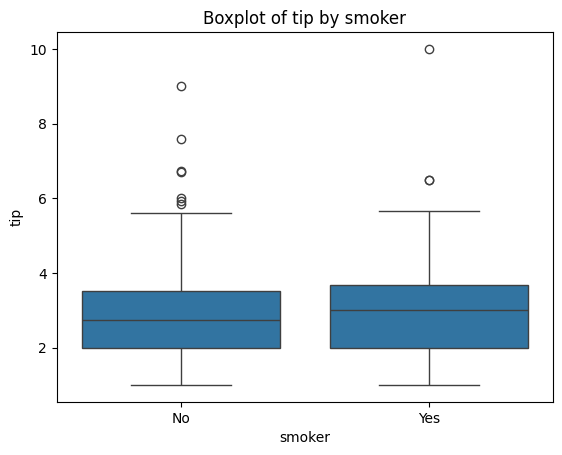

In [253]:
sns.boxplot(x="smoker", y="tip", data = df)
plt.title("Boxplot of tip by smoker")
plt.show()

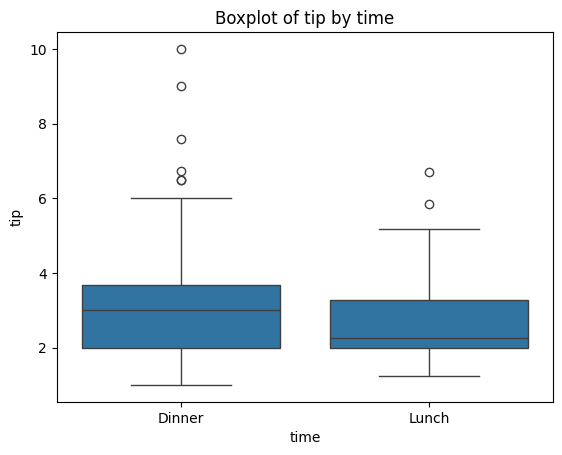

In [254]:
sns.boxplot(x="time", y="tip", data = df)
plt.title("Boxplot of tip by time")
plt.show()

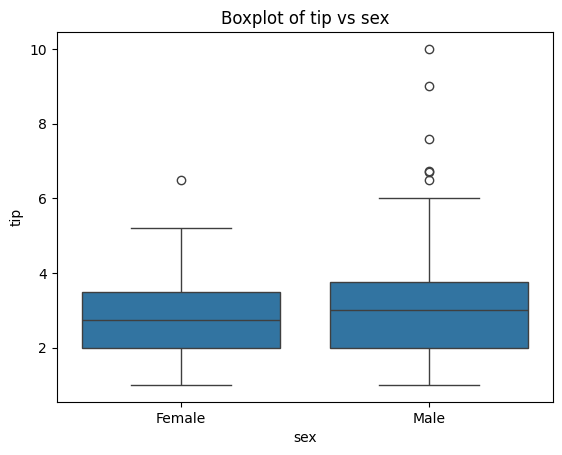

In [255]:
sns.boxplot(x="sex", y="tip", data = df)
plt.title("Boxplot of tip vs sex")
plt.show()

In [256]:
df = df.drop(['sex','time', 'smoker' , 'day'] , axis =1 )
#because the target variable doesnt depends much on these features

In [257]:
df.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [258]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score

In [259]:
df = pd.get_dummies(df, drop_first=True)

In [260]:
x = df[['total_bill', 'size']]  # Independent variable (predictor)
y = df['tip'] #dependent varible(target)

In [261]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [262]:
# 1.Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Evaluating the model's performance
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", MSE)
print("R-squared(Coefficient of determination):", r2)

Mean Squared Error: 0.6485996190543517
R-squared(Coefficient of determination): 0.4811084097989491


In [263]:
# 2. Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
print("\nRidge Regression:")
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))


Ridge Regression:
R2 Score: 0.48188287736278423
MSE: 0.6476315567917145


In [264]:
# 3. Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
print("\nLasso Regression:")
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso Regression:
R2 Score: 0.5273068720881755
MSE: 0.5908528649971524


In [265]:
# 4. Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("\nDecision Tree Regression:")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree Regression:
R2 Score: 0.1962183089778119
MSE: 1.0047040816326531


In [266]:
# 5. Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("\nRandom Forest Regression:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest Regression:
R2 Score: 0.3326175906132479
MSE: 0.8342088880725631


In [267]:
# 6. Support Vector Regression (SVR)
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
print("\nSupport Vector Regression (SVR):")
print("R2 Score:", r2_score(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))


Support Vector Regression (SVR):
R2 Score: 0.5721968127152731
MSE: 0.534741725522283


In [268]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("\nKNN Regression:")
print("R2 Score:", r2_score(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))


KNN Regression:
R2 Score: 0.4050596025324963
MSE: 0.7436584489795918


In [269]:
# Feature importance from Random Forest
importances = rf.feature_importances_
features = x.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print("\nFeature Importances (Random Forest):")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importances (Random Forest):
      Feature  Importance
0  total_bill    0.904029
1        size    0.095971


# 1.because the dataset is small , removing the outliers was reducing the accuracy of our models , so we chose to keep the outliers.
# 2. SVR gave the best r2_score among all the models 
# 3. total bill and size significantly impacted the tip amount.
# 4. Saturday was the busiest day , more customers visited during dinner time.
# 5. average tip amount was more on saturday and sunday.